In [ ]:
# Split the dataset into train, test, and val subfolders

import os
import shutil
import random

def split_data(source_folder, output_folder, train_ratio=0.6, test_ratio=0.3, val_ratio=0.1):
    """
    Split data from a source folder into train, test, and val subfolders.

    Args:
        source_folder (str): Path to the folder containing class subfolders.
        output_folder (str): Path to the output folder to create train, test, and val subfolders.
        train_ratio (float): Ratio of images for the train set.
        test_ratio (float): Ratio of images for the test set.
        val_ratio (float): Ratio of images for the validation set.
    """
    # Check ratios sum to 1
    if not abs(train_ratio + test_ratio + val_ratio - 1.0) < 1e-6:
        print("Ratios must sum up to 1.")
        return

    # Create the output subfolders
    for split in ['train', 'test', 'val']:
        os.makedirs(os.path.join(output_folder, split), exist_ok=True)

    # Iterate over each class folder in the source folder
    for class_folder in os.listdir(source_folder):
        class_path = os.path.join(source_folder, class_folder)
        if not os.path.isdir(class_path):
            continue

        # Get all image files in the class folder
        images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        random.shuffle(images)  # Shuffle to ensure randomness

        # Calculate split sizes
        total_images = len(images)
        train_count = int(total_images * train_ratio)
        test_count = int(total_images * test_ratio)
        val_count = total_images - train_count - test_count

        # Split images
        train_images = images[:train_count]
        test_images = images[train_count:train_count + test_count]
        val_images = images[train_count + test_count:]

        # Copy images to respective folders
        for split, split_images in zip(['train', 'test', 'val'], [train_images, test_images, val_images]):
            split_class_folder = os.path.join(output_folder, split, class_folder)
            os.makedirs(split_class_folder, exist_ok=True)
            for image in split_images:
                shutil.copy2(os.path.join(class_path, image), os.path.join(split_class_folder, image))

        print(f"Class '{class_folder}': {train_count} train, {test_count} test, {val_count} val images split.")

# Example usage
source = "C:/Users/salla/Programmation/Pro/ITS/Deep Learning for Multimedia/final_project/whicher-weather-classification/model/cloud_dataset/CCSN_v2"
output = "C:/Users/salla/Programmation/Pro/ITS/Deep Learning for Multimedia/final_project/whicher-weather-classification/model/cloud_dataset/CCSN_split"
split_data(source, output, train_ratio=0.6, test_ratio=0.3, val_ratio=0.1)


Class 'Ac': 132 train, 66 test, 23 val images split.
Class 'As': 112 train, 56 test, 20 val images split.
Class 'Cb': 145 train, 72 test, 25 val images split.
Class 'Cc': 160 train, 80 test, 28 val images split.
Class 'Ci': 83 train, 41 test, 15 val images split.
Class 'Cs': 172 train, 86 test, 29 val images split.
Class 'Ct': 120 train, 60 test, 20 val images split.
Class 'Cu': 109 train, 54 test, 19 val images split.
Class 'Ns': 164 train, 82 test, 28 val images split.
Class 'Sc': 204 train, 102 test, 34 val images split.
Class 'St': 121 train, 60 test, 21 val images split.


Text(0.5, 1.0, 'Augmented Image')

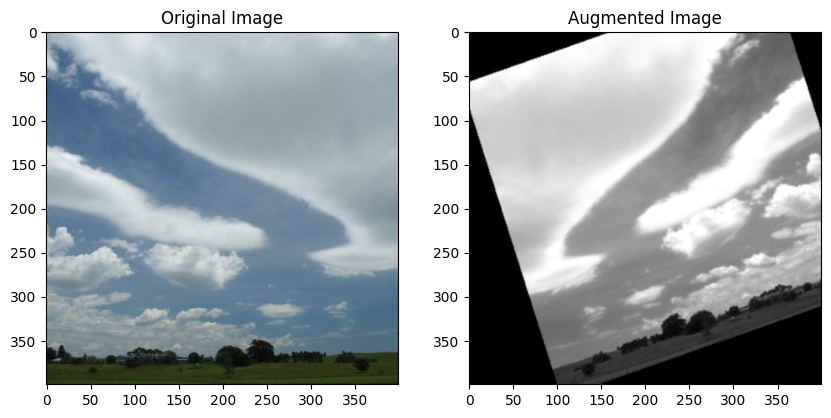

In [78]:
# Examples of augmentation

from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the transformations
augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop((224, 224)),
    transforms.RandomAffine(degrees=20, translate=(0.3, 0.3), scale=(0.8, 1.2), shear=20),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.GaussianBlur(3, sigma=(0.1, 2.0)),
    transforms.RandomGrayscale(p=0.2)
])

augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=20, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10),
    # transforms.RandomCrop((224, 224)),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.GaussianBlur(3, sigma=(0.1, 2.0)),
    transforms.RandomGrayscale(p=0.2)
])

# Apply the transformations to an image
image = Image.open("model/cloud_dataset/CCSN_split/train/Ac/Ac-N003.jpg")
image_augmented = augmentation(image)

# Display the original and augmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(image_augmented)
plt.title("Augmented Image")


In [75]:
import torch
import torch.nn    as nn
import torchvision as tv


model = tv.models.mobilenet_v3_small(weights = tv.models.MobileNet_V3_Small_Weights.DEFAULT)
model.classifier

# tv.models.mobilenet_v3_small(pretrained=True).


Sequential(
  (0): Linear(in_features=576, out_features=1024, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=1024, out_features=1000, bias=True)
)